In [16]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from InputProcessor import *
import h5py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


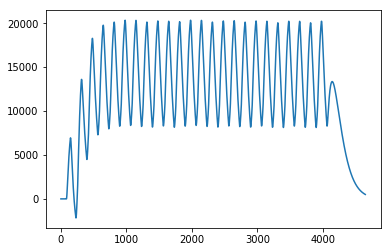

In [3]:
pos_out, avdu_out = process_input(800)
plt.plot(avdu_out[1,:])

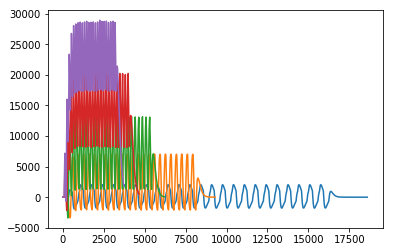

In [4]:
for i in range(5):
    pos_out, avdu_out = process_input((i+1)*200)
    plt.plot(avdu_out[1,:])

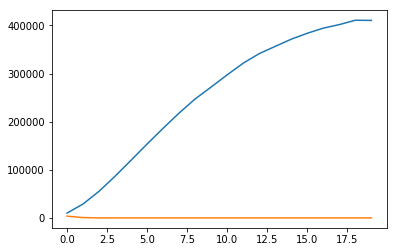

In [5]:
xx = np.zeros(20)
yy = np.zeros(20)
for i in range(20) :
    pos_out, avdu_out = process_input((i+1)*500)
    xx[i] = np.max(avdu_out[1,])
    yy[i] = np.max(avdu_out[0,])
plt.plot(xx)
plt.plot(yy)

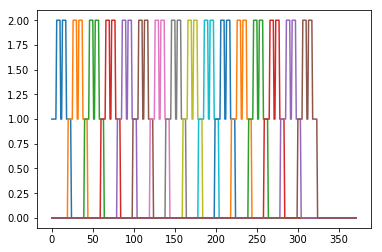

In [6]:
for i in range(16):
    plt.plot(pos_out[i,:])

In [18]:
def create_input_file(file_name, dt=1e-4, angular_velocity = 500):
    """
    Create input stimulus for sensory neurons in artificial LPU.
    Creates an HDF5 file containing input signals for the specified number of
    neurons. The signals consist of a rectangular pulse of specified duration
    and magnitude.
    Parameters
    ----------
    file_name : str
        Name of output HDF5 file.
    dt : float
        Time resolution of generated signal.
    """
    t, pos_out, avdu_out = process_input(500)
    inp = np.transpose(np.concatenate((pos_out,avdu_out)))

    
    N_driver = 2
    N_ring = 16
    
    uids = ["driver_" + str(i) for i in range(N_driver)]
    uids.extend(["ring_" + str(i) for i in range(N_ring)])
    uids = np.array(uids, dtype = 'S')


    with h5py.File(file_name, 'w') as f:
        f.create_dataset('I/uids', data=uids)
        f.create_dataset('I/data', (len(t),N_ring+N_driver),
                         dtype=np.float64,
                         data=inp)
create_input_file("input.h5")